In [2]:
import numpy as np
import random

import matplotlib.pyplot as plt


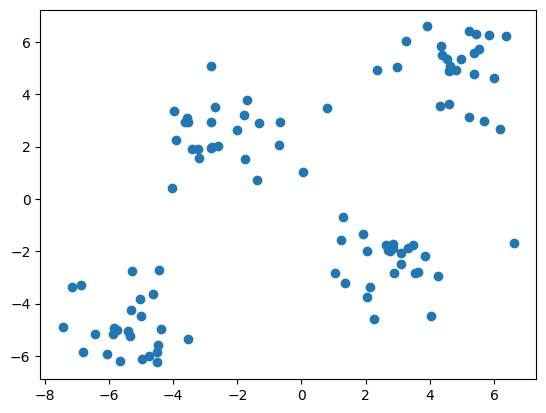

In [3]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

plt.scatter(X[:,0],X[:,1])

In [7]:
class KMeans:

    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        random_indices = random.sample(range(X.shape[0]), self.n_clusters)  # randomly select n_clusters data points
        self.centroids = X[random_indices]

        for i in range(self.max_iter):
            cluster_grp = self.assign_clusters(X)   # assigning the clusters to all the data points
            old_centroids = self.centroids.copy()
            self.centroids = self.move_centroids(X, cluster_grp)
            if np.array_equal(old_centroids, self.centroids):  # check if the centroids have moved
                break
        return cluster_grp  # last cluster assignment

    def assign_clusters(self, X):
        cluster_grp = []

        for row in X:
            distances = []    #list to store the dist bw a pt and all the clusters
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))  #calculating the euclidean distance bw the points and each centroid
            cluster_assigned = distances.index(min(distances))   # minnimum distance of the pt from a centroid -> assign that cluster
            cluster_grp.append(cluster_assigned)

        return np.array(cluster_grp)

    def move_centroids(self, X, cluster_grp):      # if new pts are added to the cluster then the centroid will be updated
        new_centroids = []
        cluster_type = np.unique(cluster_grp)

        for type in cluster_type:
            cluster_mean = X[cluster_grp == type].mean(axis=0) #  mean for each cluster is updated
            new_centroids.append(cluster_mean)

        return np.array(new_centroids)


In [9]:
km= KMeans(n_clusters =4, max_iter =100)
y_kmeans = km.fit_predict(X)
y_kmeans

array([1, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 1, 0, 0, 0, 3, 2, 2, 2, 2, 2,
       0, 1, 0, 1, 0, 1, 2, 3, 0, 3, 1, 2, 1, 1, 0, 3, 0, 3, 1, 2, 3, 3,
       2, 3, 0, 1, 0, 0, 1, 2, 3, 3, 3, 2, 3, 2, 3, 1, 3, 1, 2, 3, 0, 1,
       3, 3, 3, 2, 3, 1, 1, 2, 3, 2, 2, 3, 3, 2, 0, 0, 0, 1, 0, 2, 1, 3,
       2, 1, 0, 2, 1, 3, 0, 2, 0, 1, 1, 0])

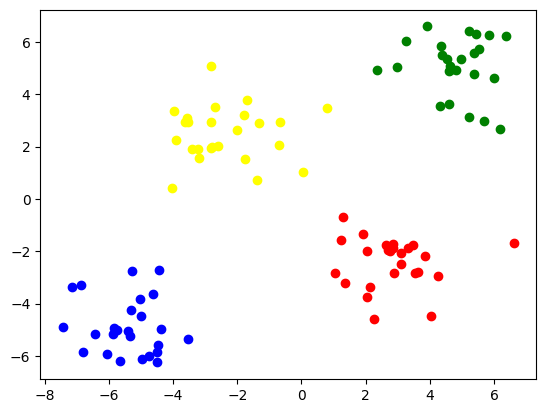

In [10]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],color='red')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],color='blue')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],color='green')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],color='yellow')
plt.show()

In [13]:
# applying the custom algo on a dataset
import pandas as pd
df =pd.read_csv("student_clustering.csv")
X = df.iloc[:,:].values

kmeans1= KMeans(n_clusters =4, max_iter =100)
y_kmeans1 = kmeans1.fit_predict(X)
y_kmeans1



array([2, 1, 3, 3, 1, 1, 3, 0, 1, 3, 2, 1, 3, 2, 1, 3, 1, 3, 1, 1, 3, 2,
       3, 2, 2, 3, 2, 0, 3, 1, 0, 1, 0, 1, 3, 3, 0, 1, 2, 1, 2, 3, 3, 2,
       0, 0, 3, 1, 0, 1, 2, 2, 0, 3, 0, 1, 1, 0, 1, 0, 1, 3, 3, 0, 2, 0,
       3, 2, 1, 3, 1, 0, 3, 2, 1, 0, 1, 0, 2, 3, 3, 0, 1, 2, 0, 2, 0, 1,
       0, 1, 0, 0, 3, 2, 3, 3, 0, 3, 2, 0, 1, 2, 2, 0, 2, 2, 3, 2, 0, 0,
       3, 0, 1, 1, 3, 0, 3, 1, 0, 2, 2, 1, 3, 0, 3, 2, 3, 1, 2, 3, 3, 1,
       2, 2, 1, 0, 1, 2, 3, 3, 3, 2, 1, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0,
       2, 3, 1, 0, 1, 3, 2, 0, 1, 3, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 3,
       0, 1, 2, 0, 0, 1, 1, 1, 3, 2, 3, 3, 0, 1, 3, 3, 2, 2, 3, 2, 0, 1,
       1, 0])

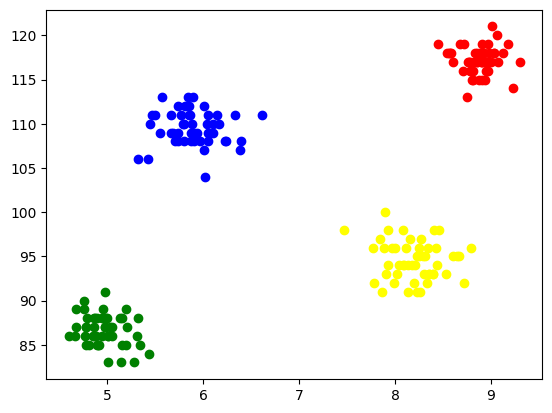

In [14]:
plt.scatter(X[y_kmeans1 == 0,0],X[y_kmeans1 == 0,1],color='red')
plt.scatter(X[y_kmeans1 == 1,0],X[y_kmeans1 == 1,1],color='blue')
plt.scatter(X[y_kmeans1 == 2,0],X[y_kmeans1 == 2,1],color='green')
plt.scatter(X[y_kmeans1 == 3,0],X[y_kmeans1 == 3,1],color='yellow')
plt.show()